# Main Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
import re
import os

# import data
cb_1x = os.path.join("..", "clean-files", "aggr", "agg-cf-1-1.csv")
cf_1x = os.path.join("..", "clean-files", "aggr", "agg-cf-1.csv")

# Calculations for every file

#### 1x Scenarios

In [2]:
# Read content of the file
df_cb_1 = pd.read_csv(cb_1x)
df_cf_1 = pd.read_csv(cf_1x)

# Behavior Graphics 

## 1X Scenarios

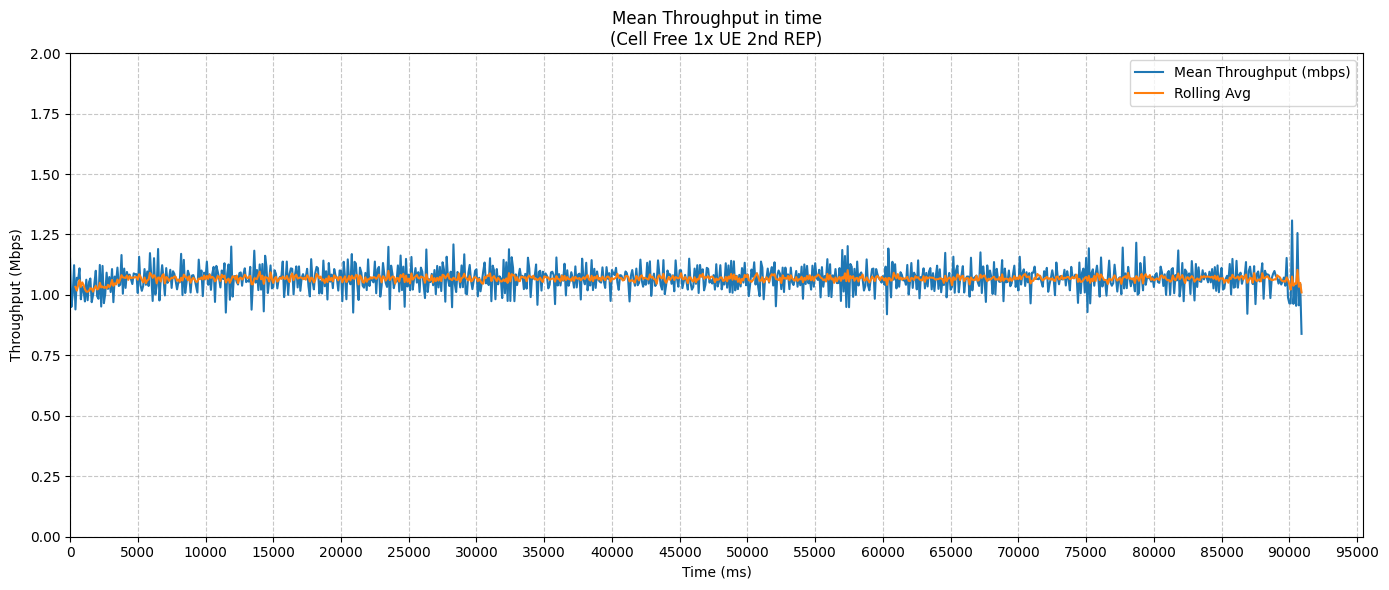

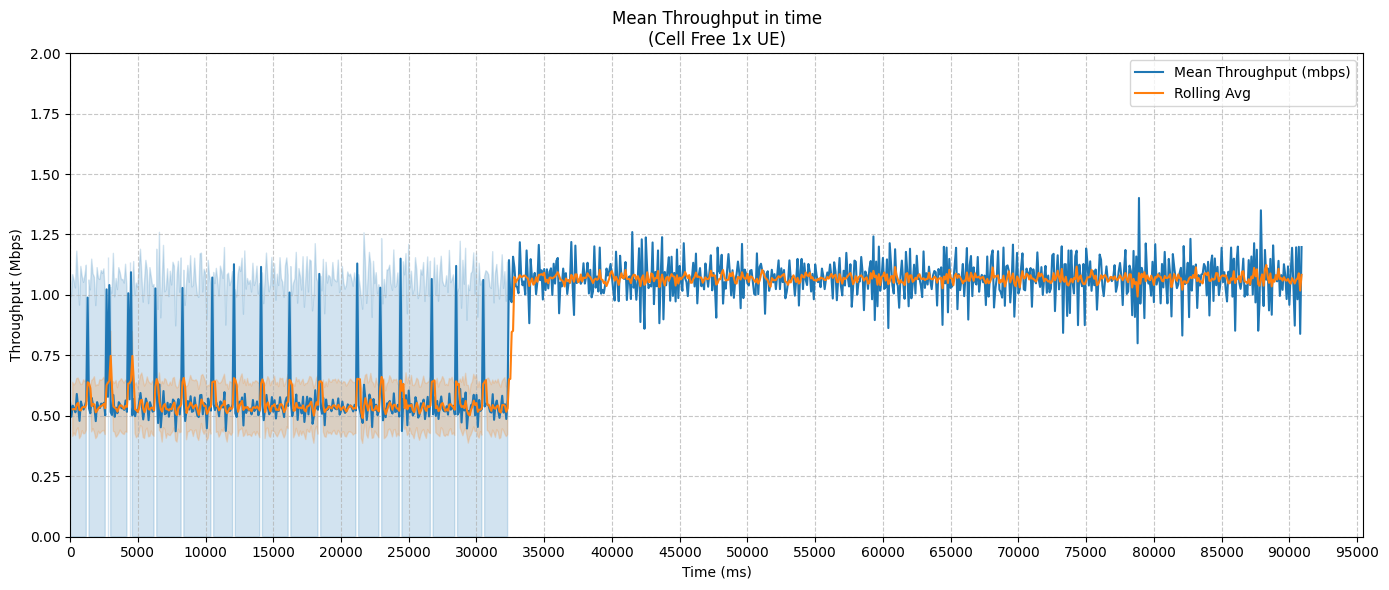

In [6]:
# Round of throughput values to 3 decimal places
df_cb_1["Mean_Throughput"] = df_cb_1["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cb_1["Rolling Avg (Mbps)"] = df_cb_1["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df_cb_1, label="Mean Throughput (mbps)")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_1, label="Rolling Avg")
plt.title("Mean Throughput in time\n(Cell Free 1x UE 2nd REP)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Round of throughput values to 3 decimal places
df_cf_1["Mean_Throughput"] = df_cf_1["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cf_1["Rolling Avg (Mbps)"] = df_cf_1["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df_cf_1, label="Mean Throughput (mbps)")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_1, label="Rolling Avg")
plt.title("Mean Throughput in time\n(Cell Free 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
print(df_cb_1["Mean_Throughput"].describe())
print(df_cf_1["Mean_Throughput"].describe())

count    910.000000
mean       1.066745
std        0.052832
min        0.839000
25%        1.033000
50%        1.068000
75%        1.102000
max        1.308000
Name: Mean_Throughput, dtype: float64
count    1215.000000
mean        0.799190
std         0.468691
min         0.000000
25%         0.000000
50%         1.039000
75%         1.098500
max         1.401000
Name: Mean_Throughput, dtype: float64


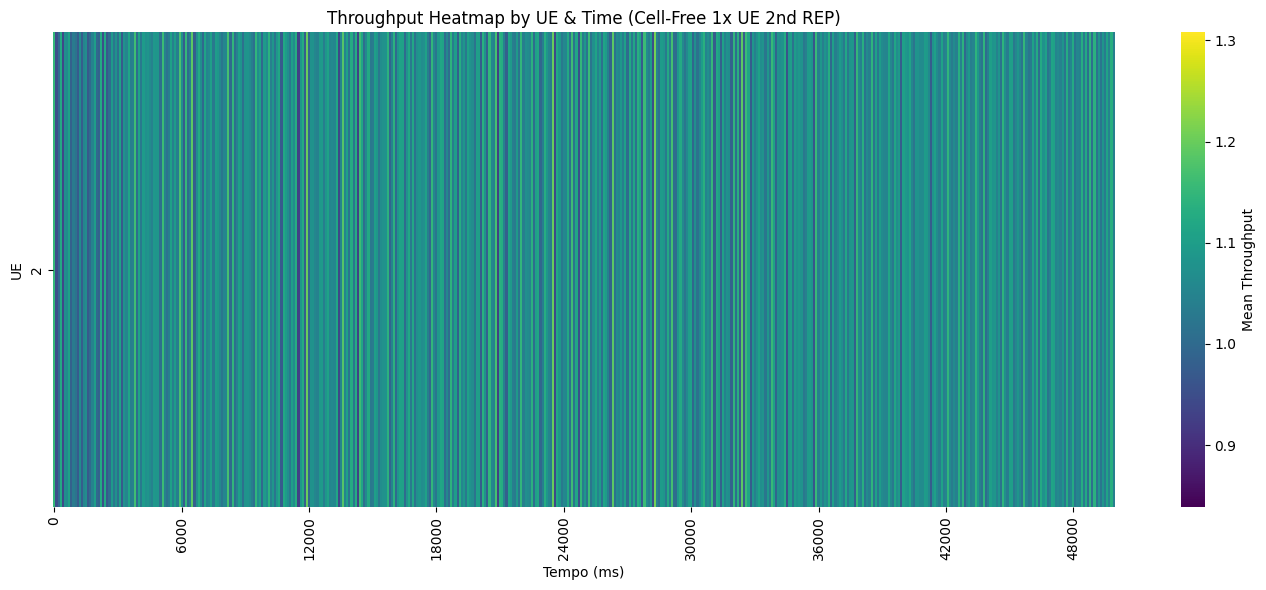

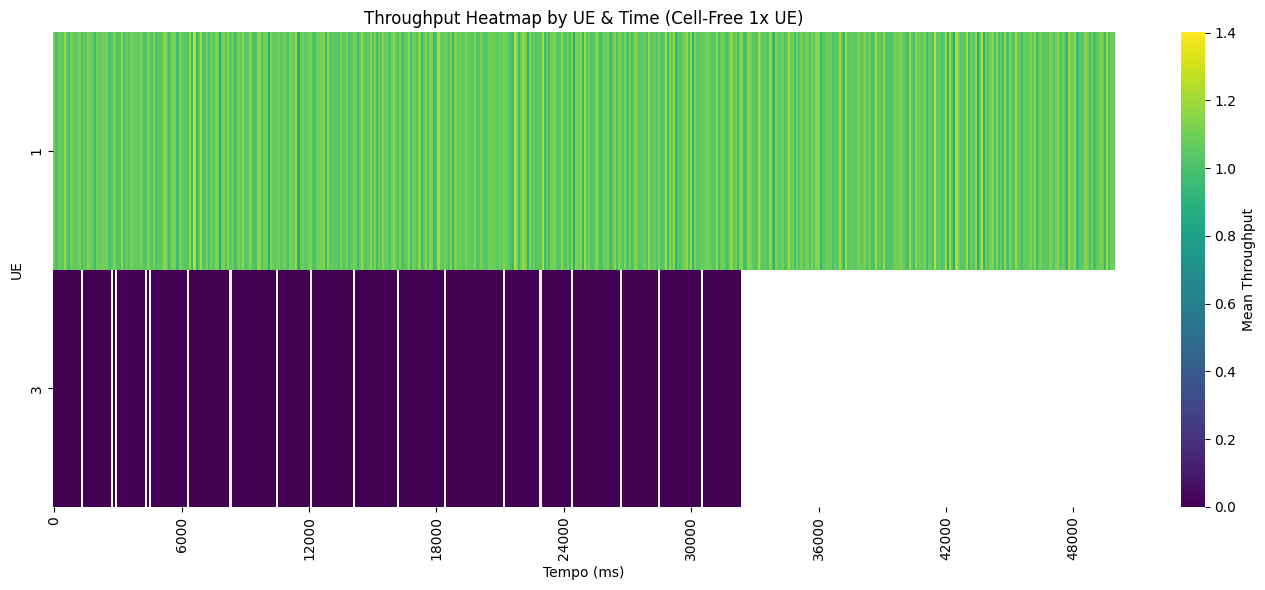

In [8]:

heat_cb = df_cb_1.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")
heat_cf = df_cf_1.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean Throughput'})
plt.title("Throughput Heatmap by UE & Time (Cell-Free 1x UE 2nd REP)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean Throughput'})
plt.title("Throughput Heatmap by UE & Time (Cell-Free 1x UE)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

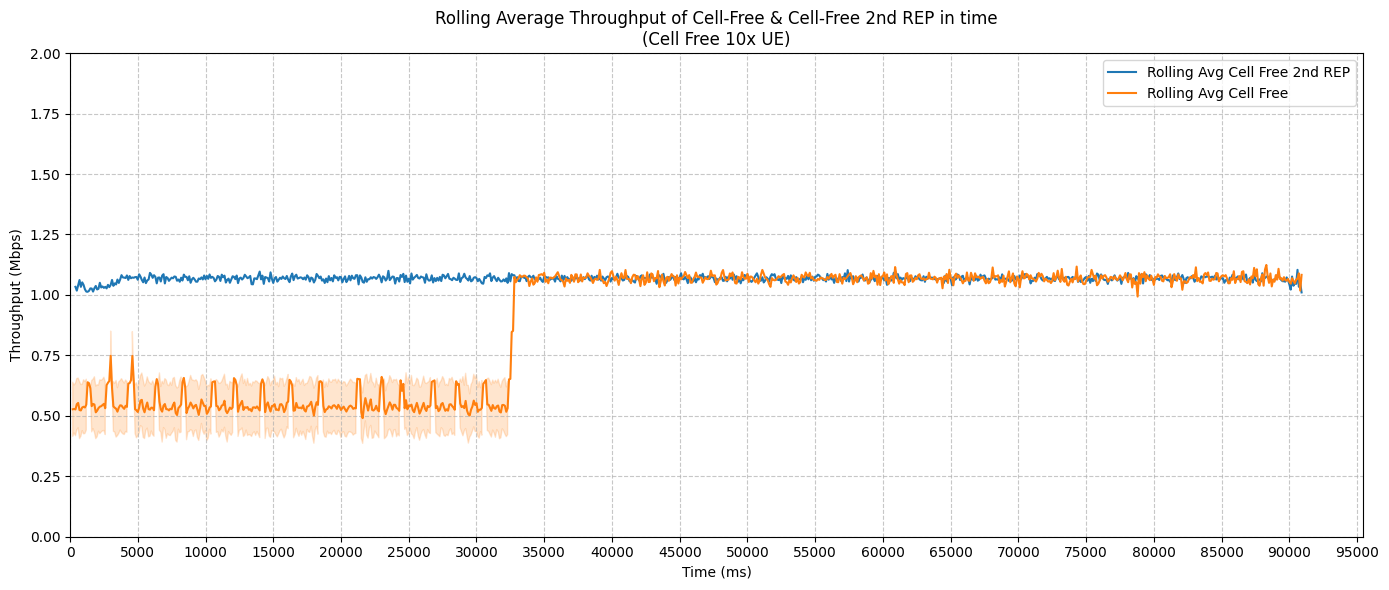

In [9]:
# Round of throughput values to 3 decimal places
df_cb_1["Mean_Throughput"] = df_cb_1["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cb_1["Rolling Avg (Mbps)"] = df_cb_1["Mean_Throughput"].rolling(window=5).mean()

# Round of throughput values to 3 decimal places
df_cf_1["Mean_Throughput"] = df_cf_1["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cf_1["Rolling Avg (Mbps)"] = df_cf_1["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_1, label="Rolling Avg Cell Free 2nd REP")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_1, label="Rolling Avg Cell Free")
plt.title("Rolling Average Throughput of Cell-Free & Cell-Free 2nd REP in time\n(Cell Free 10x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()